<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Bootcamp_DS_Mod01_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 01 - Visualizando dados do SUS

## Aula 02
*   Acompanhamento da Aula 02
*   Resolução dos Desafios



Olá, iniciaremos as práticas, análises e estudos sobre dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Para a nossa segunda análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Na Aula 02 do Módulo 01 vamos explorar os dados relativos aos Procedimentos Hospitalares do SUS de 2008 até os dias atuais. 

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [13]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Tratando os dados para a visualização em gráfico






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Primeiro, vamos verificar quais colunas possuem dados numéricos:

In [15]:
# Testando o modo de leitura imprimindo as médias dos gastos por ano
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

Após analisarmos as colunas com valores numéricos, vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

In [21]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [50]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

### Visualização dos dados em gráficos




Agora, vamos fazer uma breve exploração dos dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

Para isso, vamos plotar inicialmente o gráfico com os valores totais dos gastos em todas as Unidades da Federação nos períodos que separamos anteriormente no nosso DataFrame para fixar o conteúdo de visualizações por gráficos.

Primeiro, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos transpor o nosso gráfico fazendo com que os dados da coluna(mês e ano) passem para linha(Unidades da federação) e vice-versa e, além disso, vamos separar os ids das unidades da federação para que apareça apenas o nome dos estados.

In [51]:
# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)
dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,2674958.94,2

---

In [57]:
#Tirando a coluna de Totais para não distorcer nosso gráfico
dados_completos = dados_completos.drop("Total", axis=1)

Plotando nosso gráfico com todas Unidades Federais:

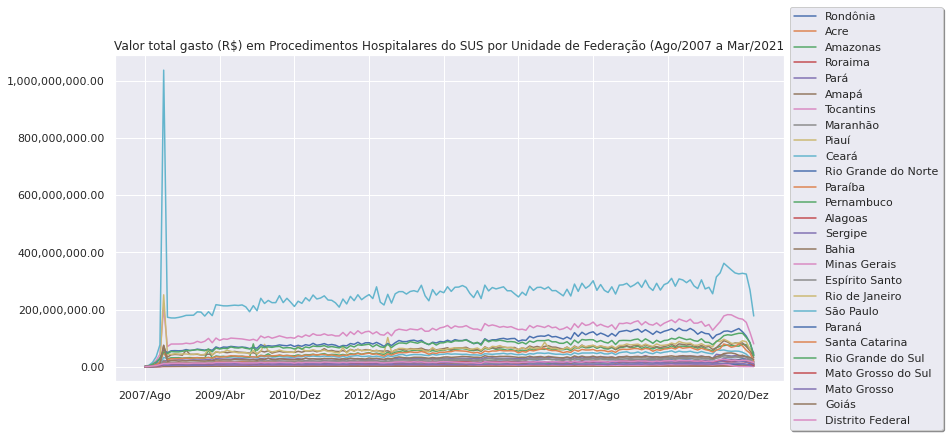

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_completos.T.plot(figsize=(12, 6), legend=None)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.title("Valor total gasto (R$) em Procedimentos Hospitalares do SUS por Unidade de Federação (Ago/2007 a Mar/2021")
plt.show()

Para prosseguir a minha análise, vou escolher os 5 estados da Região Nordeste com as maiores médias de gastos no SUS no período entre 2007 e 2021:

In [150]:
# Passando o identificador de id para separar só os dados da Região Nordeste 
dados_completos["id_uf"] = id_uf

# Para usar o query foi necessário mudar os ids para o tipo inteiro. 
dados_completos["id_uf"] = dados_completos["id_uf"].astype('int64')

# Id's que identificam todos os estados da Região Nordeste
id_uf_nordeste = list(range(21,30))

# Fazendo uma query dos dados da Região Nordeste
dados_nordeste = dados_completos.query('id_uf in @id_uf_nordeste')

#Fazendo o drop dos ids para não influenciarem no gráfico
dados_completos = dados_completos.drop("id_uf", axis=1)
dados_nordeste = dados_nordeste.drop("id_uf", axis=1)

dados_nordeste

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,14553978.06,14536700.20,14609872.57,15317881.85,15617699.59,15643973.86,14644528.47,16509174.38,15323800.01,19000528.61,17947811.13,18274483.44,18108112.36,18026071.20,18566524.68,18710607.19,19044993.31,18373019.22,17558736.88,19282093.56,17569101.52,21316090.03,19804547.24,20646225.47,19887224.90,20272804.23,20504334.40,20002266.78,19676260.18,19181018.80,...,27083233.19,29443684.76,26363802.42,29905370.54,30897068.02,30281504.24,28453973.46,30806965.30,30838532.57,29976987.17,31005862.24,28237905.90,27802462.95,30160826.23,27614666.06,30322908.98,30475196.99,32603116.94,29836256.42,31293695.07,31374933.66,31617443.39,30205022.97,31081861.45,29882634.85,31644389.22,28876348.04,29401096.62,24555641.06,34835605.89,35894441.09,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11
Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,10465088.93,10618079.70,10645917.52,11037940.55,11143375.71,10583049.66,10151738.46,12411956.66,10896197.27,13754374.44,12570578.13,12936419.98,12205840.71,12883412.78,12877691.95,12497153.44,12541516.67,12421929.89,11098207.01,12554360.19,11398067.83,13606085.88,12157142.10,13077016.55,12062273.73,11786099.56,12297891.70,11996938.27,12369486.97,11686383.33,...,15042889.08,15979472.64,13645830.22,16164249.27,16313578.41,17280760.34,16132887.17,16216685.50,16550617.02,15762154.38,16799247.17,15744012.68,15605164.36,16917253.12,15557928.97,16878130.00,16779468.57,18016632.11,17165218.35,17522996.01,17833872.84,17916788.90,19172977.04,17666561.44,16846903.02,17313368.84,16308573.14,15534772.69,12302920.77,15643037.09,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53
Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,29463965.11,30302691.99,29304821.51,30435026.82,31741382.87,30415959.60,30263904.48,32123065.16,28875478.53,36018826.32,35445605.90,34894016.82,33399345.34,34459796.32,34129887.37,33410351.78,33743129.25,32285582.67,31981440.73,34001962.62,30730683.21,36109330.17,34139573.93,36838614.26,33486379.49,34320454.26,35533813.82,34034162.50,34092124.70,32807749.83,...,44452653.04,48586284.74,42120360.66,48637258.49,50805625.71,51998581.31,47406805.41,47916557.96,51376446.25,46560335.78,52227057.03,47717852.54,45194615.82,51302833.45,47533935.93,50654425.80,52336204.61,55381997.05,49997697.54,54340019.60,51672585.01,51750791.62,53952404.24,50215470.13,48450464.27,53141363.31,49234260.33,46718050.22,44956286.28,59152597.50,57225862.97,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55
Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,12298227.11,11640067.28,12397524.20,126293

In [194]:
# Fazendo a tranposição do gráfico para verificar as 5 maiores médias de gastos 
# com SUS entre 2007 e 2021 ordenadas de maneira decrescente.
top5_estados_nordeste = dados_nordeste.T.mean().sort_values(ascending=False).head().index.tolist()

['Bahia', 'Pernambuco', 'Ceará', 'Maranhão', 'Rio Grande do Norte']

Como podemos notar, os 5 estados do Nordeste com as maiores médias de gastos no SUS no período entre 2007 e 2021 são: Bahia, Pernambuco, Ceará, Maranhão, Rio Grande do Norte.

Após o ajuste, vamos criar um gráfico mais adequado usando a biblioteca Seaborn. No código é possível ver alguns comentários sobre as escolhas e o que faz cada trecho.

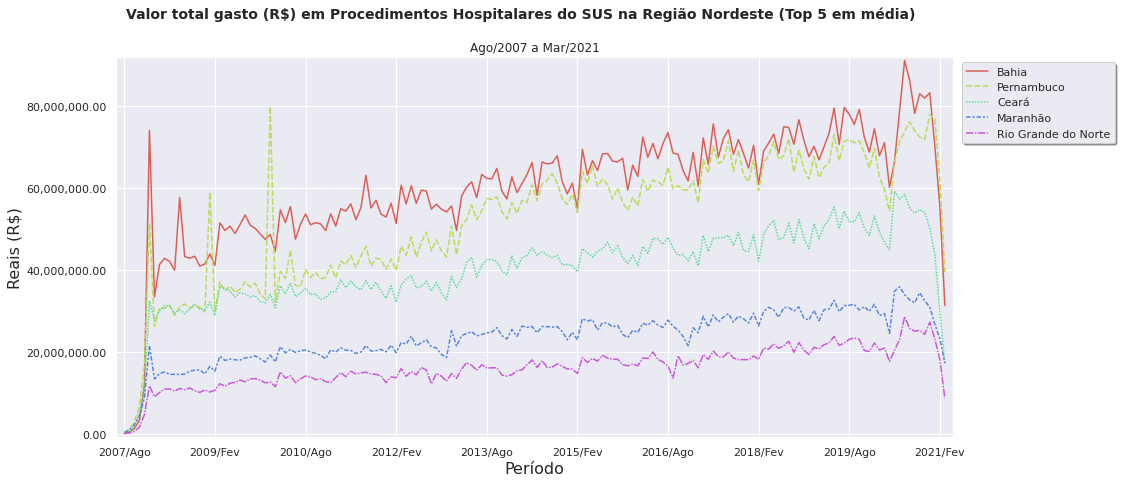

In [206]:
#Importando as bibliotecas necessárias
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Driblando um pequeno bug do Seaborn no Jupyter Notebook e configurando o tamanho de nossa figura
sns.set()
plt.figure(figsize=(15, 7))

# Desenhando um gráfico de linhas e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_nordeste.T[top5_estados_nordeste], palette= "hls")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Valor total gasto (R$) em Procedimentos Hospitalares do SUS na Região Nordeste (Top 5 em média)",
             size = 14, weight='bold')
plt.title("Ago/2007 a Mar/2021")
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.margins(.01, .01)

# Ajustando a posição dos períodos e selecionando um intervalo de 18 meses entre eles
ax.set_xticks(dados_nordeste.T[top5_estados_nordeste].index[0:164:18])

# Colocando a legenda a direita do nosso gráfico
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

# Oculta as informações no topo do gráfico
plt.show()